In [59]:
import os
import sys
import json
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
!pip install ultralytics

  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [49]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.21 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 7932MiB)
Setup complete ✅ (12 CPUs, 15.4 GB RAM, 189.6/422.9 GB disk)


In [50]:
train_file = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/train/_annotations.csv"
)
valid_file = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/valid/_annotations.csv"
)
test_file = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test/_annotations.csv"
)

In [51]:
os.makedirs(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/train/images",
    exist_ok=True,
)
os.makedirs(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/valid/images",
    exist_ok=True,
)
os.makedirs(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/test/images",
    exist_ok=True,
)

os.makedirs(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/train/labels",
    exist_ok=True,
)
os.makedirs(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/valid/labels",
    exist_ok=True,
)
os.makedirs(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/test/labels",
    exist_ok=True,
)

In [52]:
classes = {
    0: "100",
    1: "among",
    2: "angry",
    3: "ankh",
    4: "aroura",
    5: "at",
    6: "bad_thinking",
    7: "bandage",
    8: "bee",
    9: "belongs",
    10: "birth",
    11: "board_game",
    12: "book",
    13: "boy",
    14: "branch",
    15: "bread",
    16: "brewer",
    17: "builder",
    18: "bury",
    19: "canal",
    20: "cloth_on_pole",
    21: "cobra",
    22: "composite_bow",
    23: "cooked",
    24: "corpse",
    25: "dessert",
    26: "divide",
    27: "duck",
    28: "elephant",
    29: "enclosed_mound",
    30: "eye",
    31: "fabric",
    32: "face",
    33: "falcon",
    34: "fingre",
    35: "fish",
    36: "flail",
    37: "folded_cloth",
    38: "foot",
    39: "galena",
    40: "giraffe",
    41: "he",
    42: "her",
    43: "hit",
    44: "horn",
    45: "king",
    46: "leg",
    47: "length_of_a_human_arm",
    48: "life_spirit",
    49: "limit",
    50: "lion",
    51: "lizard",
    52: "loaf",
    53: "loaf_of_bread",
    54: "man",
    55: "mascot",
    56: "meet",
    57: "mother",
    58: "mouth",
    59: "musical_instrument",
    60: "nile_fish",
    61: "not",
    62: "now",
    63: "nurse",
    64: "nursing",
    65: "occur",
    66: "one",
    67: "owl",
    68: "pair",
    69: "papyrus_scroll",
    70: "pool",
    71: "quailchick",
    72: "reed",
    73: "ring",
    74: "rope",
    75: "ruler",
    76: "sail",
    77: "sandal",
    78: "semen",
    79: "small_ring",
    80: "snake",
    81: "soldier",
    82: "star",
    83: "stick",
    84: "swallow",
    85: "this",
    86: "to_be_dead",
    87: "to_protect",
    88: "to_say",
    89: "turtle",
    90: "viper",
    91: "wall",
    92: "water",
    93: "woman",
    94: "you",
}

reversed_classes = {v: k for k, v in classes.items()}
reversed_classes

{'100': 0,
 'among': 1,
 'angry': 2,
 'ankh': 3,
 'aroura': 4,
 'at': 5,
 'bad_thinking': 6,
 'bandage': 7,
 'bee': 8,
 'belongs': 9,
 'birth': 10,
 'board_game': 11,
 'book': 12,
 'boy': 13,
 'branch': 14,
 'bread': 15,
 'brewer': 16,
 'builder': 17,
 'bury': 18,
 'canal': 19,
 'cloth_on_pole': 20,
 'cobra': 21,
 'composite_bow': 22,
 'cooked': 23,
 'corpse': 24,
 'dessert': 25,
 'divide': 26,
 'duck': 27,
 'elephant': 28,
 'enclosed_mound': 29,
 'eye': 30,
 'fabric': 31,
 'face': 32,
 'falcon': 33,
 'fingre': 34,
 'fish': 35,
 'flail': 36,
 'folded_cloth': 37,
 'foot': 38,
 'galena': 39,
 'giraffe': 40,
 'he': 41,
 'her': 42,
 'hit': 43,
 'horn': 44,
 'king': 45,
 'leg': 46,
 'length_of_a_human_arm': 47,
 'life_spirit': 48,
 'limit': 49,
 'lion': 50,
 'lizard': 51,
 'loaf': 52,
 'loaf_of_bread': 53,
 'man': 54,
 'mascot': 55,
 'meet': 56,
 'mother': 57,
 'mouth': 58,
 'musical_instrument': 59,
 'nile_fish': 60,
 'not': 61,
 'now': 62,
 'nurse': 63,
 'nursing': 64,
 'occur': 65,
 'one

In [53]:
def to_yolo_format(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]


def prepare_data(data, path, read_img_path):
    img_counter = 0
    for i in range(len(data)):
        image_path = read_img_path + "/" + data.iloc[i, 0]

        img = cv2.imread(image_path)
        width = data.iloc[i, 1]
        height = data.iloc[i, 2]

        clss = reversed_classes[data.iloc[i, 3].lower()]

        bbox = data.iloc[i, 4:].values

        yolo_bbox = to_yolo_format(bbox, width, height)

        cv2.imwrite(f"{path}/images/image{img_counter}.jpg", img)

        with open(f"{path}/labels/image{img_counter}.txt", "w") as f:
            txt_data = f"{clss} {' '.join([str(i) for i in yolo_bbox])}"
            f.write(txt_data)
        img_counter += 1

In [54]:
prepare_data(
    train_file,
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/train",
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/train",
)

prepare_data(
    valid_file,
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/valid",
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/valid",
)

prepare_data(
    test_file,
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/test",
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/Egyptian Hieroglyphs/test",
)

In [55]:
names = [i for i in classes.values()]

yaml_file = f"""train: /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/train/images
val: /home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/valid/images

nc: 95  
names: {names}
"""

with open(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/data.yaml", "w"
) as f:
    f.write(yaml_file)

In [56]:
!yolo train model=yolov8n.pt data = "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/data.yaml" epochs=100 imgsz=640


Ultralytics 8.3.21 🚀 Python-3.10.14 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 7932MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/dataset/YOLO/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

In [58]:
result = pd.read_csv(
    "/home/hany_jr/Ai/Egyption-Hieroglyphs-detection/src/Object Detection/runs/detect/train2/results.csv"
)
result

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,26.0444,1.65243,5.58589,1.39813,0.04168,0.66039,0.03056,0.01821,1.42263,3.80532,1.31028,0.000033,0.000033,0.000033
1,2,50.2078,1.49470,4.87817,1.34621,0.27816,0.16358,0.11096,0.06709,1.43207,3.25310,1.42132,0.000066,0.000066,0.000066
2,3,74.1693,1.48514,4.49292,1.36949,0.31872,0.33800,0.28233,0.17457,1.41829,2.65753,1.41769,0.000099,0.000099,0.000099
3,4,98.0111,1.52435,4.09399,1.39263,0.43306,0.53310,0.46573,0.28731,1.40170,2.28183,1.43827,0.000098,0.000098,0.000098
4,5,122.0120,1.49066,3.67188,1.37420,0.57824,0.60351,0.66169,0.41144,1.39012,1.83130,1.44136,0.000097,0.000097,0.000097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2283.4800,1.16380,0.63488,1.25733,0.95470,0.97288,0.98093,0.65100,1.28352,0.53143,1.33126,0.000006,0.000006,0.000006
96,97,2307.1800,1.16296,0.63755,1.25582,0.96106,0.97593,0.98235,0.65005,1.28445,0.53238,1.32860,0.000005,0.000005,0.000005
97,98,2330.8500,1.16005,0.63319,1.25050,0.95803,0.97655,0.98104,0.64991,1.28086,0.52789,1.32915,0.000004,0.000004,0.000004
98,99,2354.5500,1.16721,0.63544,1.25828,0.95681,0.97847,0.98223,0.64982,1.28192,0.52871,1.32921,0.000003,0.000003,0.000003


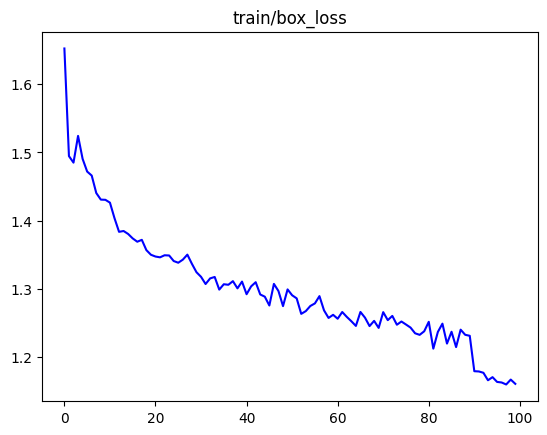

In [63]:
plt.plot(result["train/box_loss"], label="train/box_loss", color="blue")
plt.title("train/box_loss")
plt.show()

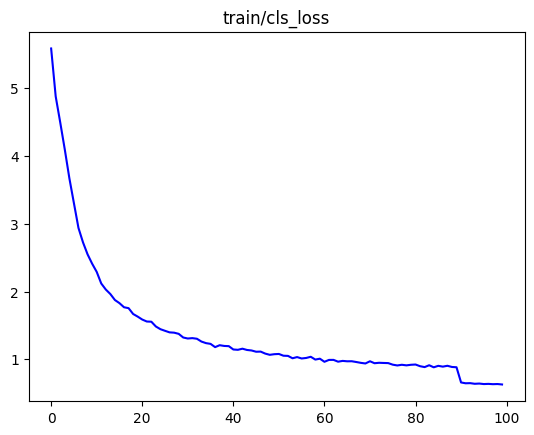

In [64]:
plt.plot(result["train/cls_loss"], label="train/cls_loss", color="blue")
plt.title("train/cls_loss")
plt.show()

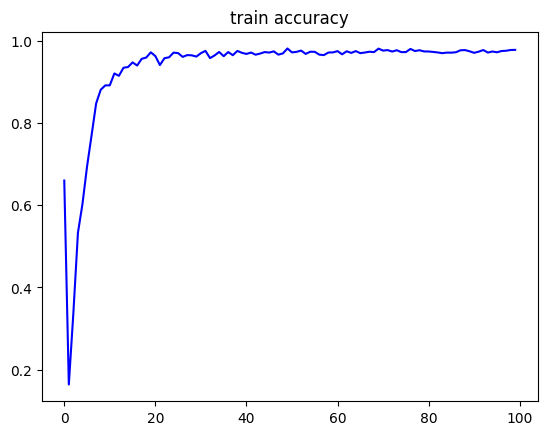

In [67]:
plt.plot(result["metrics/recall(B)"], label="metrics/recall(B)", color="blue")
plt.title("train accuracy")
plt.show()

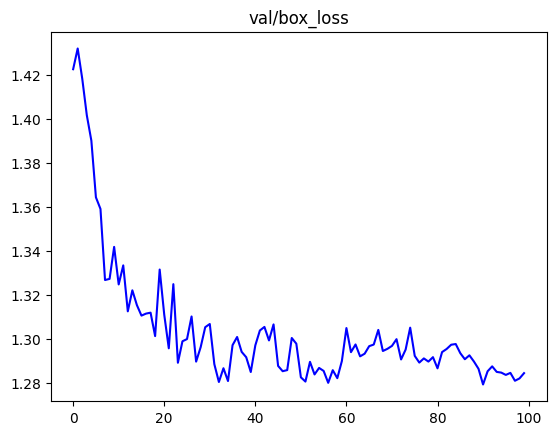

In [68]:
plt.plot(result["val/box_loss"], color="blue")
plt.title("val/box_loss")
plt.show()

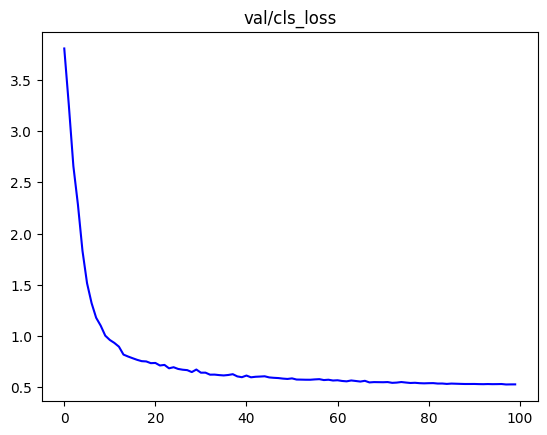

In [69]:
plt.plot(result["val/cls_loss"], color="blue")
plt.title("val/cls_loss")
plt.show()

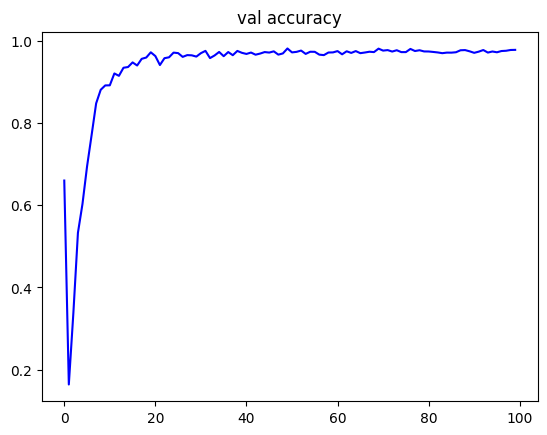

In [70]:
plt.plot(result["metrics/recall(B)"], color="blue")
plt.title("val accuracy")
plt.show()